# Problem Set 3

For this problem set you will first derive the expected branch length for the _BBAA_ site pattern and then validate the expected branch length derivations for all site patterns we have gone over thus far.

__ASSIGNMENT__
- There are two problems each with multiple components.
- For problem 1 please format all math using LaTeX in the Markdown cells I have provided—[here](https://ashki23.github.io/markdown-latex.html#latex) is a nice blog post going over all the capabilities of Markdown cells in Jupyter Notebooks, including how to use LaTeX.
- For partial credit please show your work for the derivation component and annotate your code for the coding component (i. e. math without work shown and un-annotated code will not receive partial credit).
- The included python modules are required to complete this problem set, however, you can use other modules at your own risk.
- Do not alter the simulation code or the expected branch length functions that I have provided for the _ABBA_, _BABA_, and _BBAA_ site patterns for problem 2.

__HELPFUL HINTS__
- [`msprime` documentation](https://tskit.dev/msprime/docs/stable/intro.html)
- [`tskit` documentation](https://tskit.dev/tskit/docs/stable/introduction.html)
- [General mathematical expressions in LaTeX.](https://www.overleaf.com/learn/latex/Mathematical_expressions)
- [Integrals, sums, and limits in LaTeX.](https://www.overleaf.com/learn/latex/Integrals%2C_sums_and_limits)
- If you are stuck on the derivations, draw out the coalescent histories!
- If you are stuck on the validating with simulations, think back to what branch on the tree you derived!
- Do not wait until the last minute to start this assignment!
- Feel free to add more cells if needed!
- Take a deep breath, and remember that you are very capable!


__Expected time of coalescence for two lineages conditioned on the coalescent event happening within time $c$__
\begin{equation}
\mathbb{E}\left( \overline{t} \right) = \frac{2N - \left( \left(1 - \frac{1}{2N} \right)^{c} \left(c + 2N \right) \right)}{1 - \left(1 - \frac{1}{2N} \right)^{c}}
\end{equation}

In [169]:
# Import packages.
import demes
import demesdraw
from matplotlib import pyplot as plt
import msprime
import numpy as np
import pandas as pd

## Deriving the _BBAA_ Site Pattern

__(1)__ In class we derived the expected branch lengths for the _ABBA_ and _BABA_ site patterns. Using the same three population model with constant and equal effective population sizes, please derive the expected branch length where a single mutation would result in a _BBAA_ site pattern—ie _P1_ and _P2_ share the derived allele and _P3_ harbors the ancestral allele. To receive full credit please start each derivation describing the coalescent history with words—I have provided an example for the last coalescent history—before deriving the expected branch length for that coalescent history.

__(1a)__ $C_{BBAA_{1}}$

Gene flow from $P3 \rightarrow P2$

$f$

$P2$ and $P3$ do not coalesce between $T_{GF}$ and $T_{P3}$

$(1 - \frac{1}{2N})^{T_{GF} - T_{P3}}$

$P1$ and $P2$ coalesce in the first coalescent event after $T_{P3}$

$\frac{1}{3}$

$\mathbb{E}(branch\ length) = 2N$

$C_{BBAA_{1}} = (f)(1 - \frac{1}{2N})^{T_{GF} - T_{P3}}(\frac{2N}{3})$

__(1b)__ $C_{BBAA_{2}}$

No gene flow from $P3 \rightarrow P2$

$(1 - f)$

$P1$ and $P2$ coalesce between $T_{2}$ and $T_{P3}$

$1 - (1 - \frac{1}{2N})^{T_{3} - T_{P2}}$

$\mathbb{E}(branch\ length) = (T_{P3} + 2N) - (T_{P2})$

$C_{BBAA_{2}} = (1-f)(1 - (1 - \frac{1}{2N})^{T_{3} - T_{P2}})(T_{P3} + 2N) - (T_{P2})$

__(1c)__ $C_{BBAA_{3}}$

No gene flow from $P3 \rightarrow P2$

$(1-f)$

$P3$ and $P2$ do not coalesce between $T_{GF}$ and $T_{P3}$

$(1 - \frac{1}{2N})^{T_{GF} - T_{P3}}$

$P1$ and $P2$ coalesce in the first coalescent event after $T_{P3}$

$\frac{1}{3}$

$\mathbb{E}(branch\ length) = 2N$

$C_{BBAA_{3}} = (1-f)(1 - \frac{1}{2N})^{T_{GF} - T_{P3}}(\frac{2N}{3})$

__(1d)__ $\mathbb{E}(\tau_{BBAA})$ = $C_{BBAA_{1}}$ + $C_{BBAA_{2}}$ + $C_{BBAA_{3}}$

$= (f)(1 - \frac{1}{2N})^{T_{GF} - T_{P3}}(\frac{2N}{3}) + (1-f)(1 - (1 - \frac{1}{2N})^{T_{3} - T_{P2}})(T_{P3} + 2N) - (T_{P2}) + (1-f)(1 - \frac{1}{2N})^{T_{GF} - T_{P3}}(\frac{2N}{3})$

## Validating Site Pattern Derivations 

__(2)__ Below, I have provided a demographic model that reflects the underlying model used in our site pattern derivations. Additionally I have provided you with the functions for calculating the expected branch lengths for the _ABBA_, _BABA_, and _BBAA_ site patterns. Using this demographic model I would like you to validate the expected branch lengths for the _ABBA_, _BABA_, and _BBAA_ site patterns. Specifically, I would like you to validate the analytical solutions by making a plot showing how the expected branch length for each site pattern changes with respect to the admixture proportion, for $f \in \{0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1\}$. For each admixture proportion perform 10,000 replicate simulations without recombination or mutation, sampling one haploid lineage per focal population, to find the mean branch length per admixture proportion. __(2a)__ Your final plot should have the admixture proportion on the x-axis, the expected branch length on the y-axis, the analytical solutions for each site pattern as a line on the plot, and the mean branch length from the 10,000 replicate simulations overlaid as dots on top of the analytical solutions. After you have validated the expected branch lengths please provide some interpretation of your results being sure to answer the following questions: __(2b)__ How does the expected branch length of each site pattern increase or decrease as the admixture proportion increases? __(2c)__ The trends that you are observing are for the case of introgression from $P3$ into $P2$ (ie $P3 \rightarrow P2$), how would expect the trends to change if we instead simulated introgression from $P3$ into $P1$ (ie $P3 \rightarrow P1$)?

__Simulation Parameters to Validate Analytical Results__
- $T_{P3} = 16,000$ generations ago
- $T_{P2} = 4,000$ generations ago
- $T_{GF} = 1,600$ generations ago
- $N = 10,000$

In [170]:
# Define IUA model of introgression.
def iua_human_model(f):
    # Intialize demographic model.
    iua_model = msprime.Demography()
    # We assume constant and equal effective population sizes for
    # all lineages.
    iua_model.add_population(name="P1", initial_size=10_000)
    iua_model.add_population(name="P2", initial_size=10_000)
    iua_model.add_population(name="P3", initial_size=10_000)
    iua_model.add_population(name="P12", initial_size=10_000)
    iua_model.add_population(name="P123", initial_size=10_000)
    # Introgression from the Neanderthal to the Eurasian lineage
    # occuring 1,600 generations ago with a probability of f.
    iua_model.add_mass_migration(
        time=1_600,
        source="P2",
        dest="P3",
        proportion=f,
    )
    # The African and Eurasian lineages merge into the anatomically
    # modern human lineage 4,000 generations ago.
    iua_model.add_population_split(
        time=4_000,
        derived=["P1", "P2"],
        ancestral="P12",
    )
    # The anatomically modern human and Neanderthal lineages merge
    # into the ancestral human lineage 16,000 generations ago.
    iua_model.add_population_split(
        time=16_000,
        derived=["P12", "P3"],
        ancestral="P123",
    )
    return iua_model

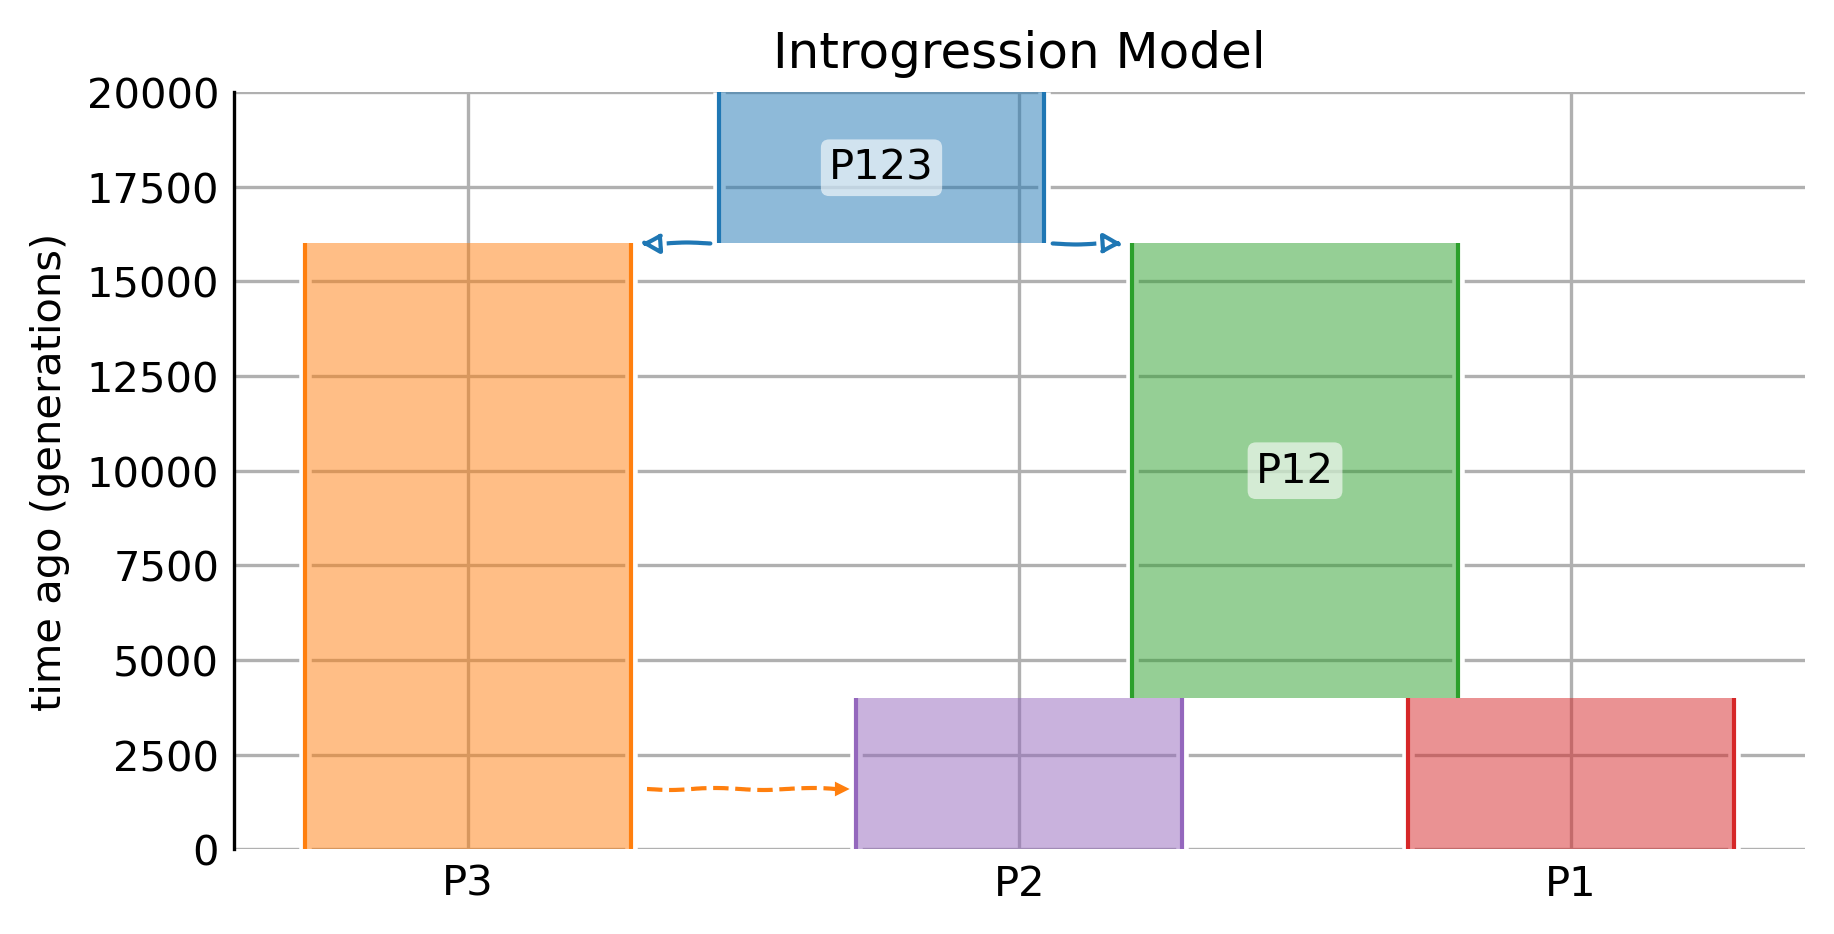

In [171]:
# Intialize a model with an introgression prbability of 0.1 .
iua_f01_demo = iua_human_model(0.1)
# Convert the demographic object to a demes graph.
iua_f01_graph = msprime.Demography.to_demes(iua_f01_demo)
# Intialize the figure.
fig = plt.figure(
    figsize=(6, 3),
    constrained_layout=True,
    dpi=300.0,
)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(
    iua_f01_graph,
    ax=ax,
    title="Introgression Model",
    seed=42,
)
# Show the plot.
plt.show()

In [172]:
# Define a function to compute the expectated branch length for the ABBA site pattern.
def e_abba(
    Tp3,
    Tp2,
    Tgf,
    N,
    f,
):
    """
    ###########################################################################
    INPUT
        Tp3: Divergence time between P12 and P3.
        Tp2: Divergence time between P1 and P2.
        Tgf: Time of gene flow (introgression) from P3 -> P2.
        N: Constant and equal effective population size.
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Expected branch length that would generate an ABBA site pattern.
    ###########################################################################
    """
    e_abba = (
        (1 - f) * (((2 * N) / float(3)) * ((1 - (1 / float(2 * N))) ** (Tp3 - Tp2)))
    ) + (
        f
        * (
            (((2 * N) / float(3)) * ((1 - (1 / float(2 * N))) ** (Tp3 - Tgf)))
            + (Tp3 - Tgf)
        )
    )
    return e_abba


# Define a function to compute the expectated branch length for the BABA site pattern.
def e_baba(
    Tp3,
    Tp2,
    Tgf,
    N,
    f,
):
    """
    ###########################################################################
    INPUT
        Tp3: Divergence time between P12 and P3.
        Tp2: Divergence time between P1 and P2.
        Tgf: Time of gene flow (introgression) from P3 -> P2.
        N: Constant and equal effective population size.
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Expected branch length that would generate an BABA site pattern.
    ###########################################################################
    """
    e_baba = (
        (1 - f) * (((2 * N) / float(3)) * ((1 - (1 / float(2 * N))) ** (Tp3 - Tp2)))
    ) + (f * (((2 * N) / float(3)) * ((1 - (1 / float(2 * N))) ** (Tp3 - Tgf))))
    return e_baba


# Discrete BBAA.
def e_bbaa(
    Tp3,
    Tp2,
    Tgf,
    N,
    f,
):
    """
    ###########################################################################
    INPUT
        Tp3: Divergence time between P12 and P3.
        Tp2: Divergence time between P1 and P2.
        Tgf: Time of gene flow (introgression) from P3 -> P2.
        N: Constant and equal effective population size.
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Expected branch length that would generate an BBAA site pattern.
    ###########################################################################
    """
    e_bbaa = (
        (1 - f)
        * (
            (((2 * N) / float(3)) * ((1 - (1 / float(2 * N))) ** (Tp3 - Tp2)))
            + (Tp3 - Tp2)
        )
    ) + (f * (((2 * N) / float(3)) * ((1 - (1 / float(2 * N))) ** (Tp3 - Tgf))))
    return e_bbaa

In [173]:
# Intialize the admixture proportions.
fs = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# Intialize a list to store simulated results.
sim_abba = []
sim_baba = []
sim_bbaa = []
# Intialize a list to store analytical results.
exp_abba = []
exp_baba = []
exp_bbaa = []
# Define the number of replicate simulations to run.
n_reps = 10_000

### Defining constants for analytical calculations ###
Tp3 = 16_000 # (3,(1,2)) 16,000 ga
Tp2 = 4_000 # (1,2) 4,000 ga
Tgf = 1_600 # Admixture at 1,600 ga
N = 10_000 # Effective population size is 10,000

# For every admixture proportion...
for f in fs:
    ###################
    # Your code here! #
    ###################
    
    # Update the analytical results by appending to exp_abba, exp_baba, and exp_bbaa.
    # Remember to pass the correct parameters to the functions defined above.
    exp_abba.append(e_abba(Tp3, Tp2, Tgf, N, f))
    exp_baba.append(e_baba(Tp3, Tp2, Tgf, N, f))
    exp_bbaa.append(e_bbaa(Tp3, Tp2, Tgf, N, f))
    
    
    # Intialize counters per site pattern.
    c_abba = 0
    c_baba = 0
    c_bbaa = 0
    # For every tree-sequence...
    for ts in msprime.sim_ancestry(
        samples=[
            msprime.SampleSet(1, ploidy=1, population="P1"),
            msprime.SampleSet(1, ploidy=1, population="P2"),
            msprime.SampleSet(1, ploidy=1, population="P3"),
        ],
        demography=iua_human_model(f),
        num_replicates=n_reps,
    ):
        # Extract the first tree.
        tree = ts.first()

        ###################
        # Your code here! #
        ###################
        # Find out if the simulated coalescent tree corresponds to an ABBA, BABA, or BBAA site pattern.
        # Update the corresponding counter.
        # First, find time to coalescence for each pair
        
        node_order = list(tree.nodes(order="preorder"))

        first_coalescent_pair = node_order[3:5]
        branch_length = tree.time(node_order[0]) - tree.time(node_order[2])
        
        if first_coalescent_pair == [1,2]: # [4, 0, 3, 1, 2] P2 and P3 First
            c_abba += branch_length
        elif first_coalescent_pair == [0,2]: # [4, 1, 3, 0, 2] P1 and P3 First
            c_baba += branch_length
        elif first_coalescent_pair == [0,1]: # [4, 2, 3, 0, 1] P
            c_bbaa += branch_length
    
    # Update the simulated results.
    sim_abba.append(c_abba / n_reps)
    sim_baba.append(c_baba / n_reps)
    sim_bbaa.append(c_bbaa / n_reps)

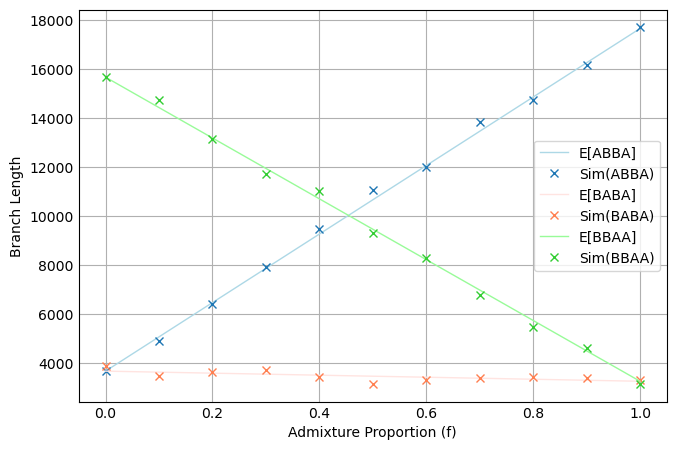

In [175]:
# PLOTTING
plt.style.use('_mpl-gallery')

# Convert lists to NumPy arrays
fs = np.array(fs)  # X-axis (admixture proportions)
sim_abba = np.array(sim_abba)
sim_baba = np.array(sim_baba)
sim_bbaa = np.array(sim_bbaa)
exp_abba = np.array(exp_abba)
exp_baba = np.array(exp_baba)
exp_bbaa = np.array(exp_bbaa)

# Create figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plot simulated values (scatter) and theoretical values (lines)
ax.plot(fs, exp_abba, linewidth=1, color="lightblue", label="E[ABBA]")
ax.plot(fs, sim_abba, 'x', linewidth=2, label="Sim(ABBA)")

ax.plot(fs, exp_baba, linewidth=1, color="mistyrose", label="E[BABA]")
ax.plot(fs, sim_baba, 'x', color="coral", linewidth=2, label="Sim(BABA)")

ax.plot(fs, exp_bbaa, linewidth=1, color="palegreen", label="E[BBAA]")
ax.plot(fs, sim_bbaa, 'x', color="limegreen", linewidth=2, label="Sim(BBAA)")

# # Labels and legend
ax.set_xlabel("Admixture Proportion (f)")
ax.set_ylabel("Branch Length")
ax.legend()

# Show the plot
plt.show()

### DISCUSSION
2(c) For the case of introgression from P3 to P2, with higher admixture proportions, we see higher rates of ABBA trees and lower rates of BBAA trees. This is because ABBA in the case of 3 -> 2 can occur due to incomplete lineage sorting (ILS) OR admixture, and ABBA trees appear more frequently when there is more admixture. BBAA trees are inversely correlated to this effect. 

In the case of BABA, these trees can only occur in this scenario due to ILS and *not* admixture, so their proportion remains relatively low regardless. If we were to have simulated 3 -> 1 admixture, then BABA would follow a similar trend to the ABBA above.